In [67]:
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.neural_network import MLPClassifier


In [68]:
f = open("__data_export.json")
data = json.load(f)

#### data and category

We create two lists - one to hold the text, and the other to hold a value representing which category it belongs in.

0: Not tagged with surgery keyword

1: Tagged with the surgery keyword


In [69]:
is_surgery = []
trial_text = []

for d in data.keys():
        if 'surgery' in data[d]['keywords']:
            is_surgery.append(1)
        else:
            is_surgery.append(0)
        data_text = ""
        for k in data[d].keys():
            if type(data[d][k]) is list or data[d][k] is None:
                continue
            else:
                data_text += str(data[d][k]) + ' '
        data_text =  re.sub('<[^<]+?>', '', data_text)
        data_text = re.sub("[^a-zA-Z0-9]"," ", data_text)
        data_text = ' '.join(data_text.split())
        trial_text.append(data_text)

#### visualize in a data frame

In [70]:
df = pd.DataFrame({'trial_text': trial_text, 'is_surgery': is_surgery})

In [72]:
#notice that we are matching on very few
#df

In [74]:
# we can sort
#df.sort_values(by=['is_surgery'], ascending=False)

In [ ]:
# let's take a very few to train a model

In [75]:
train_set = df.sort_values(by=['is_surgery'], ascending=False).head(24)

In [76]:
train_set

,is_surgery,trial_text
947,1,This is non blinded randomized controlled tria...
882,1,2007 07 31 OBJECTIVES Determine the concentrat...
202,1,2004 04 30 OBJECTIVES Compare overall survival...
3721,1,True False True True True Veterans will be exc...
4185,1,2007 03 31 PRECISE is a Phase III clinical tri...
122,1,OBJECTIVES Determine the overall survival of p...
1285,1,2014 10 31 OBJECTIVES Compare the overall surv...
1719,1,OUTLINE This is a multicenter phase II III stu...
2720,1,This is a Phase I clinical trial of experiment...
3841,1,2011 10 31 OBJECTIVES Determine the relationsh...


In [77]:
vectorizer = CountVectorizer(analyzer = "word", 
    tokenizer = None, 
    preprocessor = None, 
    stop_words = 'english',                                
    max_features = 100)

In [78]:
train_data_features = vectorizer.fit_transform(train_set['trial_text'])

In [79]:
train_data_features.toarray()

array([[1, 0, 2, ..., 0, 0, 6],
       [0, 3, 2, ..., 6, 5, 2],
       [3, 0, 2, ..., 0, 0, 5],
       ..., 
       [2, 5, 2, ..., 0, 0, 4],
       [3, 4, 2, ..., 1, 1, 2],
       [0, 0, 2, ..., 0, 1, 0]], dtype=int64)

#### visualize the positive and negative graphs

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

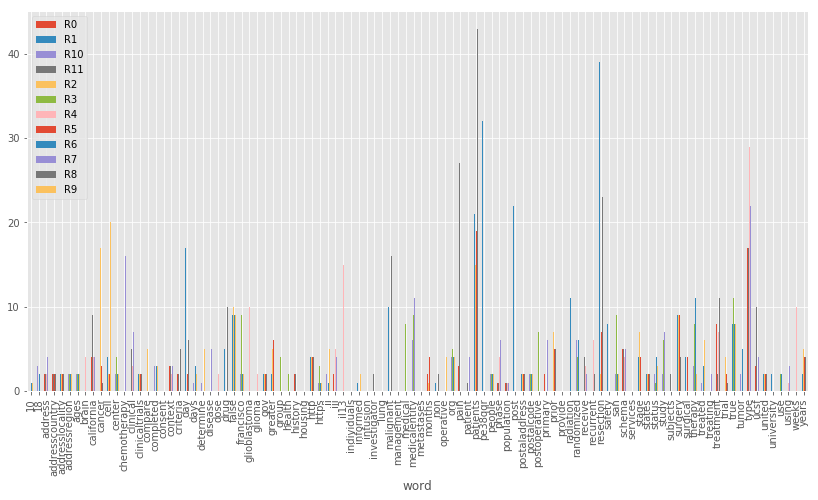

In [81]:
surgery = {}
surgery['word'] = vectorizer.get_feature_names()
for i in range(12):
    surgery['R' + str(i)] = train_data_features.toarray()[i]
    
df = pd.DataFrame(surgery)
df = df.set_index('word')

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [14,7]
df.plot(kind='bar')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

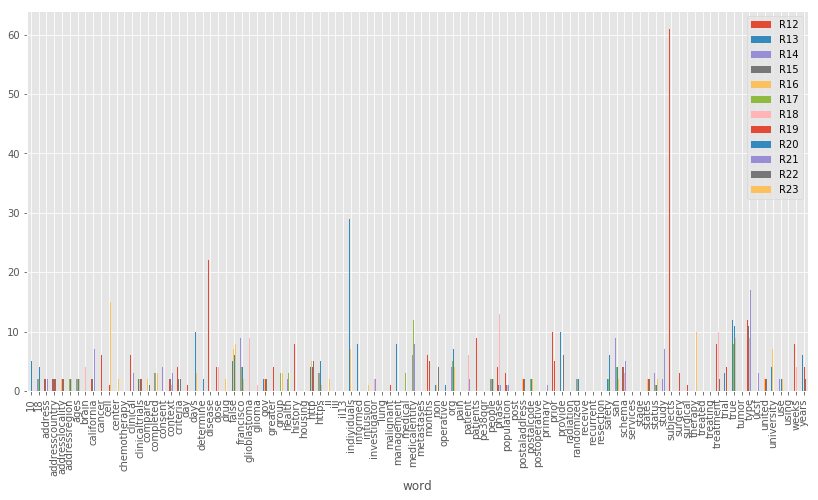

In [82]:
surgery = {}
surgery['word'] = vectorizer.get_feature_names()
for i in range(12,24):
    surgery['R' + str(i)] = train_data_features.toarray()[i]
    
df = pd.DataFrame(surgery)
df = df.set_index('word')

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [14,7]
df.plot(kind='bar')
plt.xticks(rotation=90)

In [ ]:
train_data_features.toarray()[:12]

In [83]:
clf = LogisticRegression()
#clf= MLPClassifier()
#clf = MultinomialNB()

In [ ]:
train_set["is_surgery"]

In [84]:
clf.fit(train_data_features, train_set["is_surgery"] )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
# overfitted
clf.score(train_data_features,train_set['is_surgery'])

1.0

In [ ]:
# make a prediction

In [86]:
cancer_trial = "There is a critical need for physical activity interventions in CRC. The investigators \
have developed a digital health physical activity intervention, Smart Pace, which includes a wearable \
tracker (Fitbit) and text messaging and aims to have patients build up to 150 min/wk of moderate activity"

cancer_trial = [re.sub("[^a-zA-Z0-9]"," ", cancer_trial)]

In [87]:
test_data_features = vectorizer.transform(cancer_trial)

In [88]:
binary_predictions = clf.predict_proba(test_data_features)
print(binary_predictions)

[[ 0.45566269  0.54433731]]


In [89]:
surgery_trial = "Myocardial injury after non-cardiac surgery (MINS) is common in patients undergoing\
major surgery. Many of the events are undetected and associated with a high 30-day mortality risk. \
Knowledge of which perioperative factors that predicts MINS is lacking. Decrease in tissue \
oxygenation (StO2) is common in patients undergoing major spine surgery and is associated \
with postoperative complications in these patients."

surgery_trial = [re.sub("[^a-zA-Z0-9]"," ", surgery_trial)]

In [90]:
test_data_features = vectorizer.transform(surgery_trial)

In [91]:
clf.predict_proba(test_data_features)

array([[ 0.16047269,  0.83952731]])

In [92]:
wikipedia_surgery = "is a medical specialty that uses operative manual and instrumental techniques\
on a patient to investigate or treat a pathological condition such as a disease or injury, to help\
improve bodily function or appearance or to repair\
unwanted ruptured areas"

wikipedia_surgery = [re.sub("[^a-zA-Z0-9]"," ", wikipedia_surgery)]

In [93]:
test_data_features = vectorizer.transform(wikipedia_surgery)

In [94]:
clf.predict_proba(test_data_features)

array([[ 0.40357006,  0.59642994]])

In [101]:
repeated_word = "operative " * 10
print(repeated_word)

operative operative operative operative operative operative operative operative operative operative 


In [102]:
test_data_features = vectorizer.transform([repeated_word])

In [103]:
clf.predict_proba(test_data_features)

array([[ 0.13674264,  0.86325736]])